# Project 9: A Data Analysis of your Own

For this project, we will be exploring the world of men's professional pole vaulting. In recent years, a young pole vaulter by the name of Armand "Mondo" Duplantis has been dominating competitions, leading to some people making the claim that he could be the greatest pole vaulter of all time. My goal is to see what the data has to say. For this, we will be using data scraped from tables in the [World Athletics](https://worldathletics.org/) website.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: get the data

The tables on the website are separated by indoor and outdoor results. For this analysis, we want to consider both of these, so we'll have to scrape them separately.

In [3]:
def get_indoor_page_link(page):
    return f'https://worldathletics.org/records/all-time-toplists/jumps/pole-vault/indoor/men/senior?regionType=world&page={page}&bestResultsOnly=false&firstDay=1899-12-31&lastDay=2023-04-27'


In [4]:
# looking at the website, we see 59 pages of indoor tables
indoor_tables = []
num_pages = 59
for page in range(num_pages):
    indoor_tables.extend(pd.read_html(get_indoor_page_link(page + 1)))

len(indoor_tables)

59

In [5]:
indoor_df = pd.concat(indoor_tables)
indoor_df['Season'] = 'Indoor'
indoor_df.head()

,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score,Season
0,1,6.22,Armand DUPLANTIS,10 NOV 1999,SWE,1f1,NaN,"Maison des Sports, Clermont-Ferrand (FRA)",25 FEB 2023,1328,Indoor
1,2,6.20,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Štark Arena, Beograd (SRB)",20 MAR 2022,1322,Indoor
2,3,6.19,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Štark Arena, Beograd (SRB)",07 MAR 2022,1319,Indoor
3,4,6.18,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Emirates Arena, Glasgow (GBR)",15 FEB 2020,1317,Indoor
4,5,6.17,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Arena, Toruń (POL)",08 FEB 2020,1314,Indoor


We'll now get the results from the outdoor season. Looking at the website, we see 162 pages of results.

In [6]:
def get_outdoor_page_link(page):
    return f'https://worldathletics.org/records/all-time-toplists/jumps/pole-vault/outdoor/men/senior?regionType=world&page={page}&bestResultsOnly=false&firstDay=1899-12-31&lastDay=2023-04-27'

In [7]:
outdoor_tables = []
num_pages = 162
for page in range(num_pages):
    outdoor_tables.extend(pd.read_html(get_outdoor_page_link(page + 1)))

len(outdoor_tables)

162

In [8]:
outdoor_df = pd.concat(outdoor_tables)
outdoor_df['Season'] = 'Outdoor'
outdoor_df.head()

,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score,Season
0,1,6.21,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Hayward Field, Eugene, OR (USA)",24 JUL 2022,1325,Outdoor
1,2,6.16,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Olympiastadion, Stockholm (SWE)",30 JUN 2022,1311,Outdoor
2,3,6.15,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Stadio Olimpico, Roma (ITA)",17 SEP 2020,1308,Outdoor
3,4,6.14,Sergey BUBKA,04 DEC 1963,UKR,1,NaN,Sestriere (ITA),31 JUL 1994,1306,Outdoor
4,5,6.13,Sergey BUBKA,04 DEC 1963,UKR,1,NaN,Tokyo (JPN),19 SEP 1992,1303,Outdoor


Now that we have outdoor and indoor results, let's combine them and see what the 20 highest jumps are.

In [9]:
df = pd.concat((indoor_df, outdoor_df))
df.sort_values('Mark', ascending=False).head(20)

,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score,Season
0,1,6.22,Armand DUPLANTIS,10 NOV 1999,SWE,1f1,NaN,"Maison des Sports, Clermont-Ferrand (FRA)",25 FEB 2023,1328,Indoor
0,1,6.21,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Hayward Field, Eugene, OR (USA)",24 JUL 2022,1325,Outdoor
1,2,6.20,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Štark Arena, Beograd (SRB)",20 MAR 2022,1322,Indoor
2,3,6.19,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Štark Arena, Beograd (SRB)",07 MAR 2022,1319,Indoor
3,4,6.18,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Emirates Arena, Glasgow (GBR)",15 FEB 2020,1317,Indoor
4,5,6.17,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Arena, Toruń (POL)",08 FEB 2020,1314,Indoor
1,2,6.16,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Olympiastadion, Stockholm (SWE)",30 JUN 2022,1311,Outdoor
5,6,6.16,Renaud LAVILLENIE,18 SEP 1986,FRA,1,NaN,Donetsk (UKR),15 FEB 2014,1311,Indoor
2,3,6.15,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Stadio Olimpico, Roma (ITA)",17 SEP 2020,1308,Outdoor
6,7,6.15,Sergey BUBKA,04 DEC 1963,UKR,1,NaN,Donetsk (UKR),21 FEB 1993,1308,Indoor


## Step 2: How many six meter jumps does each person have?

In pole vaulting, jumping over 6 meters is considered a right of passage into the best of all time. Few people have ever cleared this height, and many who have were only able to do it once in their career.

In [13]:
six_meter_jumps = df[df['Mark'] >= 6]
counts = six_meter_jumps['Competitor'].value_counts()
counts

Armand DUPLANTIS       44
Sergey BUBKA           44
Renaud LAVILLENIE      19
Rodion GATAULLIN        7
Jeff HARTWIG            7
Maxim TARASOV           7
Steven HOOKER           5
Sam KENDRICKS           5
Christopher NILSEN      3
Okkert BRITS            3
Brad WALKER             3
Piotr LISEK             3
Dmitri MARKOV           2
Tim LOBINGER            2
Paul BURGESS            1
Björn OTTO              1
Toby STEVENSON          1
Timothy MACK            1
Yevgeniy LUKYANENKO     1
KC LIGHTFOOT            1
Igor TRANDENKOV         1
Thiago BRAZ             1
Sondre GUTTORMSEN       1
Shawnacy BARBER         1
Daniel ECKER            1
Jean GALFIONE           1
Timur MORGUNOV          1
Name: Competitor, dtype: int64

Above we can see the number of times each person has jumped above six meters in competition. Looking at the data, there is clearly a huge gap between the top two atheletes and the third athlete. We can make charts to help us see just how large this gap is. We'll start by plotting everyone except the top two athletes, and then bring them in to see the difference.

<Axes: >

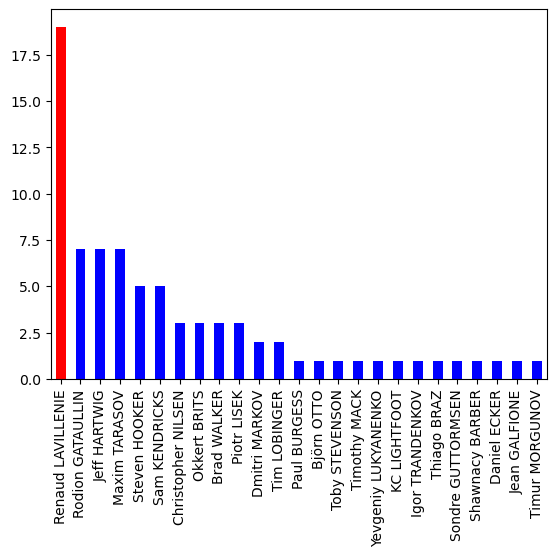

In [16]:
# plot the first person in red, and the rest in blue
counts[2:].plot(kind='bar', color=['red', *(['blue']*len(counts[2:]))])

<Axes: >

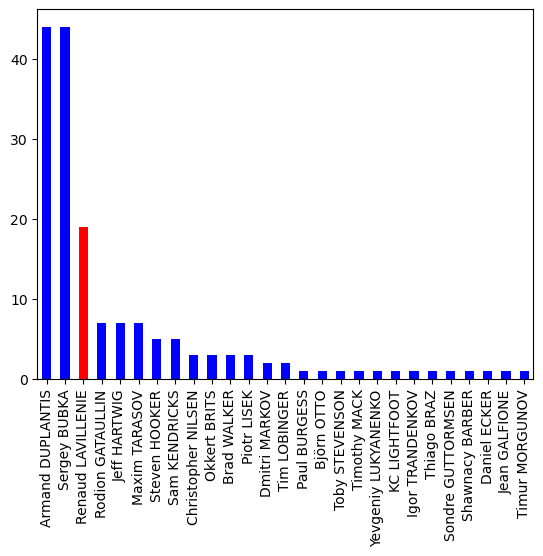

In [17]:
counts.plot.bar(counts.keys(), counts.values, color=['blue', 'blue', 'red', *(['blue']*len(counts[2:]))])

Looking at these two charts, we can see a huge gap between Renaud Lavillenie, the athlete with the third most six meter jumps, and the rest of the athletes. While this gap is certainly impressive, bringing Mondo Duplantis and Sergey Bubka into the picture show that these two athletes have an even larger gap between them and Lavillenie. However, it's certainly not clear that Duplantis could be termed the greatest pole vaulter of all time, seeing as he's exactly tied with Bubka in number of six meter jumps.

## Step 3: six meter jumps per appearance

In the previous chart, Duplantis and Bubka tied for the highest number of six meter jumps. However, Bubka has been retired for many years, while Duplantis is still a very young athlete. If we normalize the number of six meter jumps each athlete has with the total number of appearances they have in the data, would we get a more clear picture?

In [18]:
# find how many times each athlete appears in the data
appearances = df.value_counts('Competitor')
appearances

Competitor
Tim LOBINGER               468
Jeff HARTWIG               307
Renaud LAVILLENIE          302
Sergey BUBKA               268
Konstantinos FILIPPIDIS    243
                          ... 
John RYLAND                  1
Simone BERTELLI              1
John BESMER                  1
Jimmie HEATH                 1
Aaron UNTERBERGER            1
Length: 945, dtype: int64

In [19]:
# filter down to only athletes that are also in our six meter jump data set
counts_appearances = pd.concat((counts, appearances), join='inner', axis=1)
counts_appearances.columns = ('Competitor', 'Appearances')
counts_appearances.index

Index(['Armand DUPLANTIS', 'Sergey BUBKA', 'Renaud LAVILLENIE',
       'Rodion GATAULLIN', 'Jeff HARTWIG', 'Maxim TARASOV', 'Steven HOOKER',
       'Sam KENDRICKS', 'Christopher NILSEN', 'Okkert BRITS', 'Brad WALKER',
       'Piotr LISEK', 'Dmitri MARKOV', 'Tim LOBINGER', 'Paul BURGESS',
       'Björn OTTO', 'Toby STEVENSON', 'Timothy MACK', 'Yevgeniy LUKYANENKO',
       'KC LIGHTFOOT', 'Igor TRANDENKOV', 'Thiago BRAZ', 'Sondre GUTTORMSEN',
       'Shawnacy BARBER', 'Daniel ECKER', 'Jean GALFIONE', 'Timur MORGUNOV'],
      dtype='object')

<Axes: >

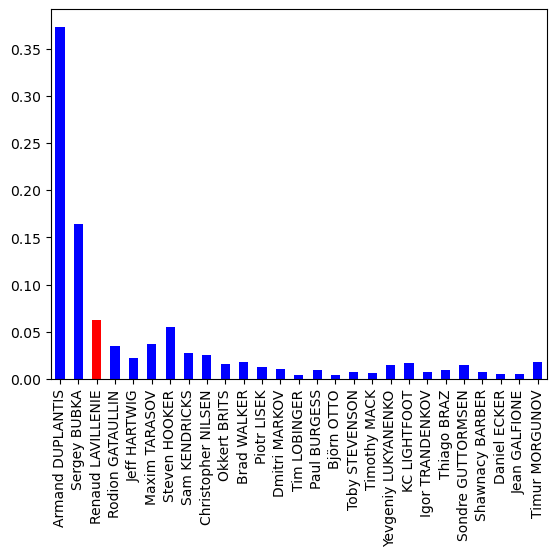

In [20]:
counts_appearances['norm'] = counts_appearances['Competitor'] / counts_appearances['Appearances']
counts_appearances['norm'].plot.bar(color=['blue', 'blue', 'red', *(['blue']*len(counts[2:]))])

Looking at this new chart, we see that Duplantis rises far above the rest of the competitors. Bubka is still in second place and holds a large lead over third, but is now nowhere near Duplantis. It appears that the number of times Mondo Duplantis has jumped over six meters compared to his time in the professional circuit makes a very strong claim that he could be considered the best.

## Step 4: world record progression

Looking at six meter jumps is just one way to judge how good a pole vaulter is. In my opinion, to be the best in the world, you have to do things that no one before you has ever done. For this, we can look at the progression of the pole vaulting world record, and see which athletes have done the most to push it forward over the years.

In [23]:
six_meter_jumps['Date'] = pd.to_datetime(six_meter_jumps['Date'])
six_meter_jumps.head()

C:\Users\elish\AppData\Local\Temp\ipykernel_22072\761691636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  six_meter_jumps['Date'] = pd.to_datetime(six_meter_jumps['Date'])


,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score,Season
0,1,6.22,Armand DUPLANTIS,10 NOV 1999,SWE,1f1,NaN,"Maison des Sports, Clermont-Ferrand (FRA)",2023-02-25,1328,Indoor
1,2,6.20,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Štark Arena, Beograd (SRB)",2022-03-20,1322,Indoor
2,3,6.19,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Štark Arena, Beograd (SRB)",2022-03-07,1319,Indoor
3,4,6.18,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Emirates Arena, Glasgow (GBR)",2020-02-15,1317,Indoor
4,5,6.17,Armand DUPLANTIS,10 NOV 1999,SWE,1,NaN,"Arena, Toruń (POL)",2020-02-08,1314,Indoor


In [24]:
# get a table of jumps with the date that they happened to calculate what the world record was
dates = six_meter_jumps.pivot_table(values='Date', index='Mark', aggfunc='min')
dates.head()

,Date
Mark,
6.00,1985-07-13
6.01,1986-07-08
6.02,1989-02-04
6.03,1987-06-23
6.04,2008-06-08


In [28]:
# match the dated marks with their athletes
athletes = []
for row in dates.iterrows():
    athletes.append(six_meter_jumps[(six_meter_jumps['Date'] == row[1].iloc[0]) & (six_meter_jumps['Mark'] == row[0])])

wr_df = pd.concat(athletes).sort_values('Date')
wr_df.head()

,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score,Season
59,60,6.00,Sergey BUBKA,04 DEC 1963,URS,1,NaN,Paris (FRA),1985-07-13,1267,Outdoor
44,45,6.01,Sergey BUBKA,04 DEC 1963,URS,1,NaN,Moskva (URS),1986-07-08,1270,Outdoor
30,31,6.03,Sergey BUBKA,04 DEC 1963,URS,1,NaN,Praha (TCH),1987-06-23,1275,Outdoor
20,21,6.05,Sergey BUBKA,04 DEC 1963,URS,1,NaN,Bratislava (TCH),1988-06-09,1281,Outdoor
16,17,6.06,Sergey BUBKA,04 DEC 1963,URS,1,NaN,Nice (FRA),1988-07-10,1283,Outdoor


In [29]:
# filter out scores that aren't in chronological order - not world records
rows = []
top_mark = 0
for row in wr_df.iterrows():
    mark = row[1].Mark
    if mark > top_mark:
        top_mark = mark
        rows.append(row[1])

records_df = pd.concat(rows, axis=1).T
records_df.head()

,Rank,Mark,Competitor,DOB,Nat,Pos,Unnamed: 6,Venue,Date,Results Score,Season
59,60,6.0,Sergey BUBKA,04 DEC 1963,URS,1,NaN,Paris (FRA),1985-07-13,1267,Outdoor
44,45,6.01,Sergey BUBKA,04 DEC 1963,URS,1,NaN,Moskva (URS),1986-07-08,1270,Outdoor
30,31,6.03,Sergey BUBKA,04 DEC 1963,URS,1,NaN,Praha (TCH),1987-06-23,1275,Outdoor
20,21,6.05,Sergey BUBKA,04 DEC 1963,URS,1,NaN,Bratislava (TCH),1988-06-09,1281,Outdoor
16,17,6.06,Sergey BUBKA,04 DEC 1963,URS,1,NaN,Nice (FRA),1988-07-10,1283,Outdoor


<Axes: xlabel='Date', ylabel='Mark'>

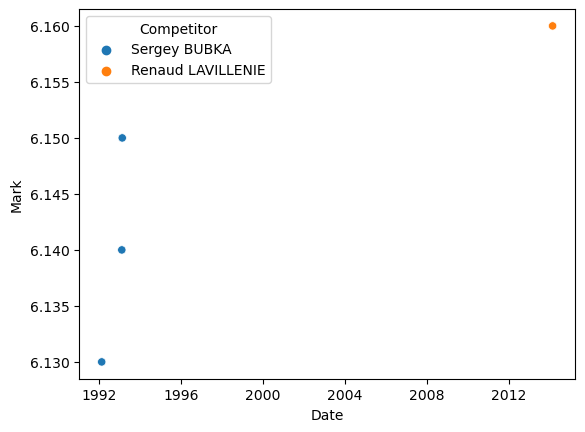

In [36]:
# plot world record progression without Duplantis
sns.scatterplot(data=records_df[(records_df['Mark'] > 6.12) & (records_df['Competitor'] != 'Armand DUPLANTIS')], x='Date', y='Mark', hue='Competitor')

<Axes: xlabel='Date', ylabel='Mark'>

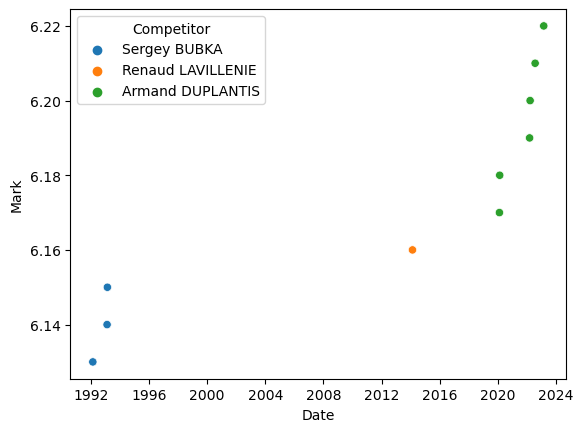

In [37]:
# plot world record progression with Duplantis
sns.scatterplot(data=records_df[records_df['Mark'] > 6.12], x='Date', y='Mark', hue='Competitor')

Looking at the charts of world record progression, we see that Sergey Bubka played a very large role in pushing the record forward, and it stood at where he left it for nearly 20 years until Renaud Lavillenie broke it. Once Mondo Duplantis entered the scene however, he has been beaking and rebreaking his own records seemingly nonstop. This evidence makes me feel comfortable making the claim that Mondo Duplantis just might be already the greatest pole vaulter of all time, and his career has barely begun.